In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

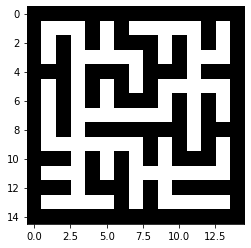

In [2]:
maze = np.loadtxt("sample_maze.txt")
plt.imshow(maze, cmap = "binary")

In [3]:
#隣接するセルの取得
def get_route(x):
    list = np.array([])
    neighbor = np.array([
        [x[0], x[1]+1],
        [x[0]+1, x[1]],
        [x[0], x[1]-1],
        [x[0]-1, x[1]]
    ])
    
    for i in neighbor:
        if not maze[i[0], i[1]]:
            list = np.append(list, [i[0], i[1]])
            
    list = np.reshape(list, [len(list) // 2, 2])
    return list.astype(np.int8)

In [4]:
#オープンリストからクローズドリストのセルの除去
def remove_route(openlist, closedlist, x):
    closedlist = np.append(closedlist, x)
    closedlist = np.reshape(closedlist, [len(closedlist) // 2, 2])
    
    overlap = []

    for i in range(len(openlist)):
        for j in range(len(closedlist)):
            if not np.sum(openlist[i]!=closedlist[j]):
                overlap.append(i)
                
    openlist = np.delete(openlist, overlap, axis=0)
    
    return openlist, closedlist

In [5]:
#深さ優先探索
def depth_search():
    openlist = np.array([[1, 1]])
    closedlist = np.array([[]])
    
    count = 0
    while(1):
        count +=1
        x = openlist[len(openlist)-1]
        #x = openlist[0]
        openlist = np.append(openlist, get_route(x), axis=0)
        openlist, closedlist = remove_route(openlist, closedlist, x)
        
        if np.any(np.prod(closedlist == [len(maze)-2, len(maze)-2], axis=1)) or len(openlist) == 0:
            break
            
    return count, closedlist

In [6]:
#幅優先探索
def width_search():
    openlist = np.array([[1, 1]])
    closedlist = np.array([[]])
    
    count = 0
    while(1):
        count +=1
        #x = openlist[len(openlist)-1]
        x = openlist[0]
        openlist = np.append(openlist, get_route(x), axis=0)
        openlist, closedlist = remove_route(openlist, closedlist, x)
        
        if np.any(np.prod(closedlist == [len(maze)-2, len(maze)-2], axis=1)) or len(openlist) == 0:
            break
            
    return count, closedlist

In [9]:
count, list = depth_search()

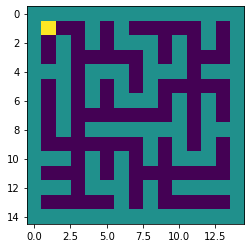

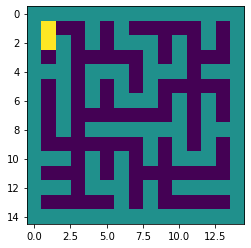

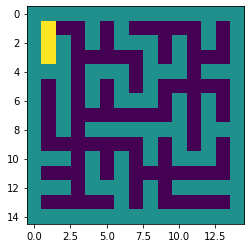

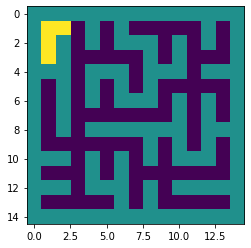

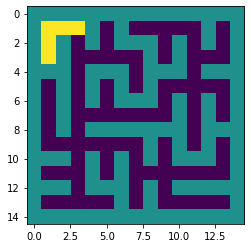

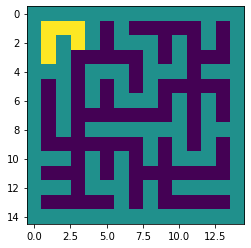

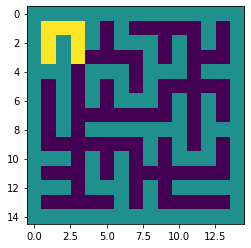

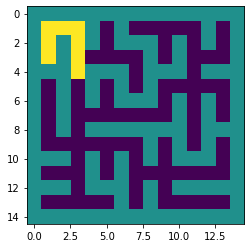

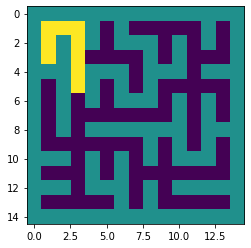

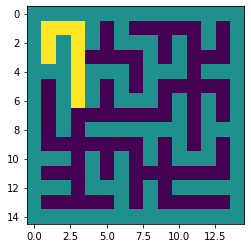

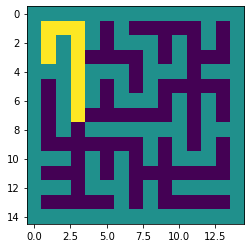

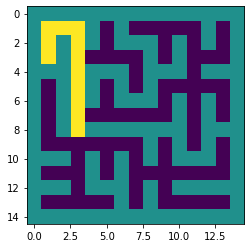

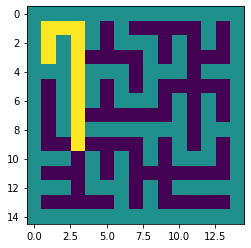

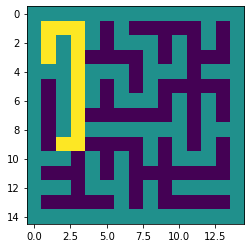

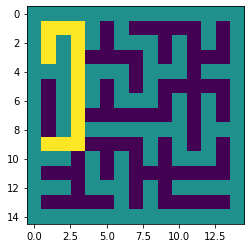

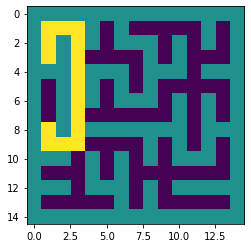

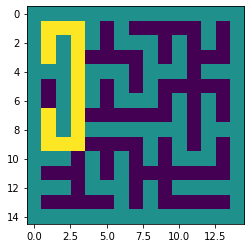

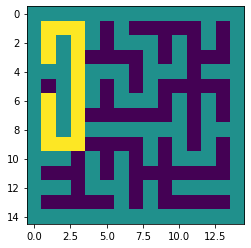

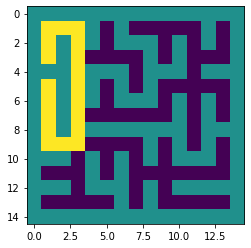

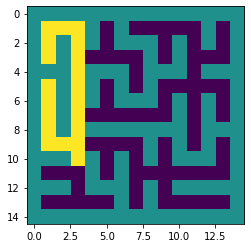

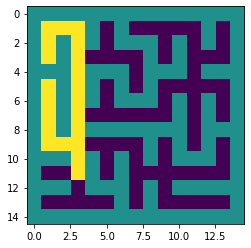

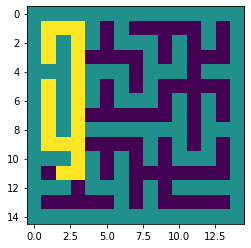

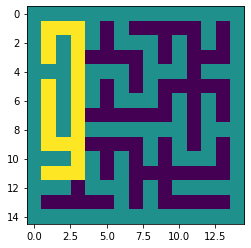

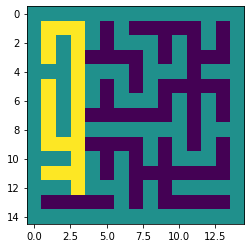

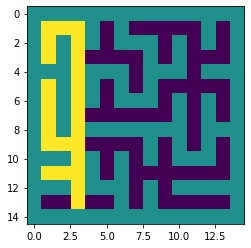

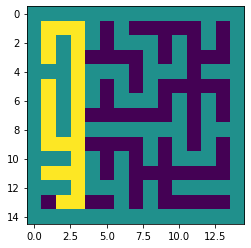

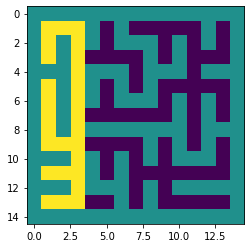

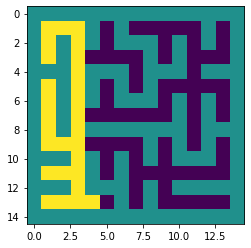

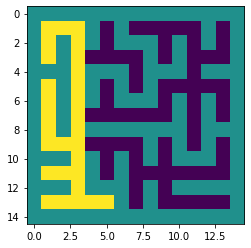

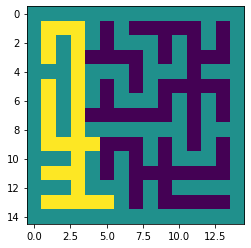

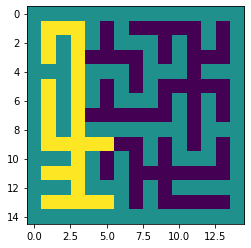

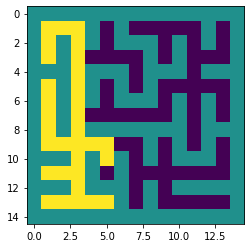

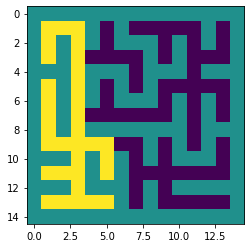

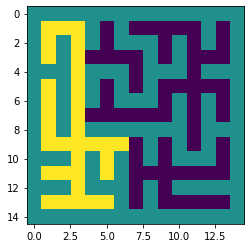

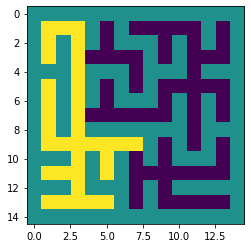

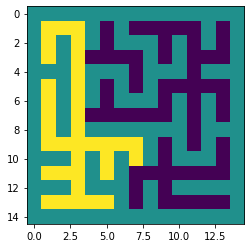

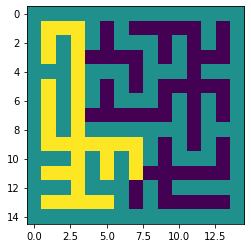

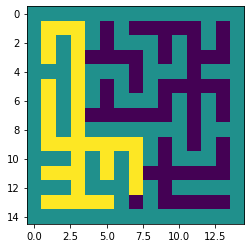

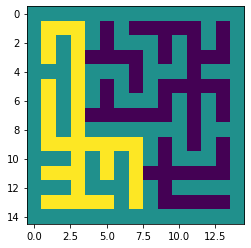

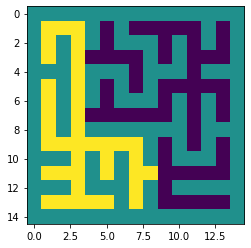

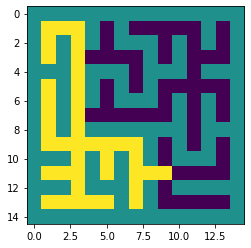

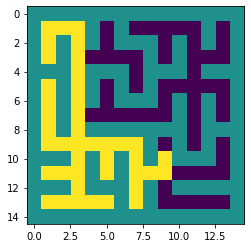

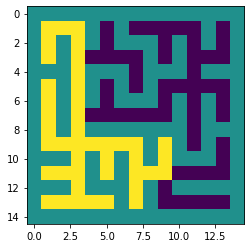

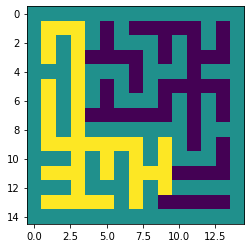

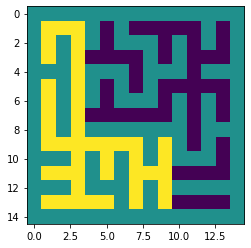

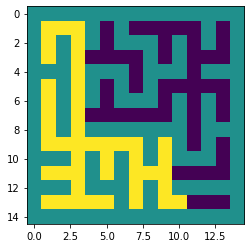

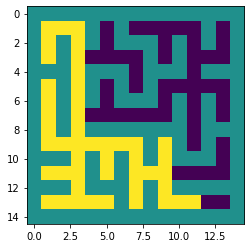

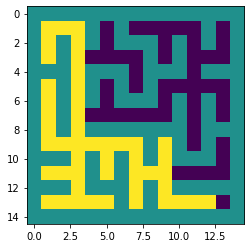

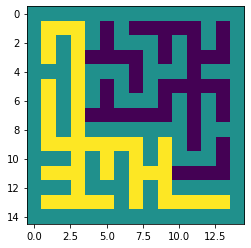

In [10]:
serched_maze = np.copy(maze)
fig = plt.figure()

for i in list:
    serched_maze[int(i[0]), int(i[1])] = 2
    plt.imshow(serched_maze)
    plt.show()
    plt.close()